In [39]:
import numpy
import matplotlib.pyplot as plt
import pandas
import pickle
import os
import re
import seaborn as sns
from sklearn import metrics
sns.set_style('white')
sns.set_palette('colorblind')

In [40]:
def attention_single_file(filename):
    with open(filename, 'rb') as file_:
        result = pickle.load(file_)
    return result

In [41]:
def prediction_filenames(dirname):
    return [run_prediction for run_prediction in os.listdir(dirname)
            if os.path.isfile(os.path.join(dirname, run_prediction)) and 'predictions' in run_prediction]

In [42]:
def labels_single_file(filename):
    result = pandas.read_csv(filename, sep='\t')
    return result

In [43]:
classifier = '18-08-29-18-24'
partition = 2
dataset = 'dev'
att_matrix = attention_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/attention_partition{}_ukp_{}.p'.format(classifier, partition, dataset))
prediction = labels_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/predictions_partition{}_ukp_{}.conll'.format(classifier, partition, dataset))
prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix['ukp']))
prediction.loc[:, 'Correct'] = (prediction.Predicted == prediction['True'])

/home/mteruel/miniconda3/envs/env_am/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


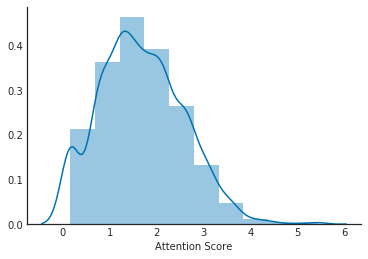

In [44]:
sns.distplot(prediction['Attention Score'], bins=10)
sns.despine()

In [45]:
prediction['Attention Score'].describe()

count    2291.000000
mean        1.675160
std         0.894487
min         0.156088
25%         1.025004
50%         1.621429
75%         2.231454
max         5.431878
Name: Attention Score, dtype: float64

In [46]:
prediction[350:450]

,Token,True,Predicted,Sentence,Attention Score,Correct
350,appeal,I-claim,I-claim,20,1.963159,True
351,on,I-claim,I-claim,20,0.902108,True
352,points,I-claim,I-claim,20,1.495391,True
353,of,I-claim,I-claim,20,0.737116,True
354,law,I-claim,I-claim,20,1.826038,True
355,without,I-claim,I-claim,20,1.868123,True
356,a,I-claim,I-claim,20,0.580411,True
357,reasoned,I-claim,I-claim,20,2.548313,True
358,decision,I-claim,I-claim,20,2.231454,True
359,infringed,I-claim,I-claim,20,2.632681,True


In [47]:
import json

In [48]:
json_words = json.dumps(
    prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[350:800]
)

In [49]:
json_words[:300]

'[["appeal", 1.9631586074829102, 20, "I-claim", true], ["on", 0.9021084308624268, 20, "I-claim", true], ["points", 1.4953912496566772, 20, "I-claim", true], ["of", 0.7371160387992859, 20, "I-claim", true], ["law", 1.8260383605957031, 20, "I-claim", true], ["without", 1.8681228160858154, 20, "I-claim"'

How to run D3 on Jupyter

It is still a mistery, and sometimes it does not work, but this worked https://blog.thedataincubator.com/2015/08/embedding-d3-in-an-ipython-notebook/


In [50]:
from IPython.core.display import display, HTML
from string import Template
import json

In [51]:
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.16/d3.min.js"></script>')

In [52]:
HTML('<script src="https://d3js.org/d3-color.v1.min.js"></script>')

In [53]:
HTML('<script src="https://d3js.org/d3-interpolate.v1.min.js"></script>')

In [54]:
HTML('<script src="https://d3js.org/d3-scale-chromatic.v1.min.js"></script>')

In [55]:
HTML('<script src="textChart.js"></script>')

In [56]:
HTML("""<script>
if (d3 === undefined) {
    alert('No d3 library');
}
if (TextChart === undefined) {
    alert('No Chart library');
}
</script>""")

In [57]:
js_text_template = Template('''
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 900,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-claim': '#FF5964',
    'I-claim': '#FF5964',
    'B-premise': '#35A7FF',  // blue
    'I-premise': '#35A7FF',
    'O': '#888888'
  }
}
chart = new TextChart(nouns, opts);
chart.draw('text-container');
''')

html_template = Template('''
    <div id='text-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
''')

js_text = js_text_template.substitute({
    'json_data': json_words
})

HTML(html_template.substitute({'js_text': js_text}))

# Essays

In [71]:
classifier = '18-09-02-03-36'
dataset = 'dev'
att_matrix = attention_single_file(
    '/home/mteruel/am/results/essays/{}/attention_essays_essays_{}.p'.format(classifier, dataset))
prediction = labels_single_file(
    '/home/mteruel/am/results/essays/{}/predictions_essays_essays_{}.conll'.format(classifier, dataset))
prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix['essays']))
prediction.loc[:, 'Correct'] = (prediction.Predicted == prediction['True'])

/home/mteruel/miniconda3/envs/env_am/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


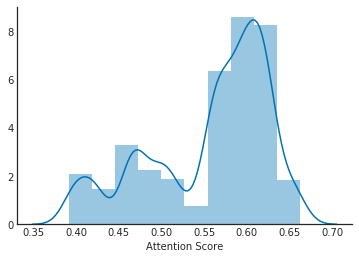

In [72]:
sns.distplot(prediction['Attention Score'], bins=10)
sns.despine()

In [73]:
prediction['Attention Score'].describe()

count    4017.000000
mean        0.556925
std         0.070246
min         0.391130
25%         0.507271
50%         0.582567
75%         0.611422
max         0.662638
Name: Attention Score, dtype: float64

In [76]:
prediction[prediction['Attention Score'] > 0.65].Token.unique()

array(['children', '.', 'food', 'Cannabis', '?', 'stadiums', 'tensions',
       'banned', 'cameras', 'language'], dtype=object)

In [77]:
prediction[:250]

,Token,True,Predicted,Sentence,Attention Score,Correct
0,computer,O,O,0,0.462986,True
1,has,O,O,0,0.466928,True
2,negative,O,O,0,0.400916,True
3,effects,O,O,0,0.425807,True
4,to,O,O,0,0.617093,True
5,children,O,O,0,0.652726,True
6,Nowadays,O,O,1,0.614013,True
7,",",O,O,1,0.606056,True
8,thanks,O,B-Premise,1,0.600189,False
9,to,O,I-Premise,1,0.586541,False


In [62]:
import json

In [78]:
json_words = json.dumps(
    prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[350:800]
)

In [79]:
json_words[:300]

'[["daily", 0.4218583106994629, 16, "I-Premise", false], ["lives", 0.6210179924964905, 16, "I-Premise", false], [".", 0.6515737771987915, 16, "O", true], ["Some", 0.6022109389305115, 17, "O", true], ["people", 0.5847971439361572, 17, "O", true], ["hold", 0.6244043707847595, 17, "O", true], ["the", 0.'

In [80]:
js_text_template = Template('''
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 900,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-Claim': '#FF5964',
    'I-Claim': '#FF5964',
    'B-Premise': '#35A7FF',  // blue
    'I-Premise': '#35A7FF',
    'O': '#888888'
  }
}
chart = new TextChart(nouns, opts);
chart.draw('essay-container');
''')

html_template = Template('''
    <div id='essay-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
''')

js_text = js_text_template.substitute({
    'json_data': json_words
})

HTML(html_template.substitute({'js_text': js_text}))